In [1]:
import qnmfits
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import HTMLWriter
from matplotlib.colors import to_hex
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

import bgp_qnm_fits as bgp

from scipy.optimize import minimize

from plot_config import PlotConfig
import corner
from matplotlib.animation import FuncAnimation
from scipy.interpolate import CubicSpline
from matplotlib.animation import PillowWriter

In [ ]:
N_MAX = 6
ID = "0001"
NUM_SAMPLES = 1000000
INCLUDE_MF = True
INCLUDE_CHIF = True

sim_main_strain = bgp.SXS_CCE(ID, type="strain", lev="Lev5", radius="R2") 
sim_main_news = bgp.SXS_CCE(ID, type="news", lev="Lev5", radius="R2")


Mf_ref = sim_main_strain.Mf
chif_mag_ref = sim_main_strain.chif_mag
qnm_list = [(2, 2, n, 1) for n in np.arange(0, N_MAX + 1)] + [(3,2,0,1)]
spherical_modes = [(2, 2)]

T0s = np.linspace(-10, 100, 110)
T = 100 

In [38]:

strain_amplitudes = np.zeros((len(T0s), len(qnm_list)))
news_amplitudes = np.zeros((len(T0s), len(qnm_list)))

for t0 in T0s:
    best_fit = qnmfits.ringdown_fit(
        sim_main_strain.times,
        sim_main_strain.h[2,2],
        qnm_list,
        Mf=sim_main_strain.Mf,
        chif=sim_main_strain.chif_mag,
        t0=t0
    )

    strain_amplitudes[T0s == t0] = np.abs(best_fit['C']) 

for t0 in T0s:
    best_fit = qnmfits.ringdown_fit(
        sim_main_news.times,
        sim_main_news.h[2,2],
        qnm_list,
        Mf=sim_main_news.Mf,
        chif=sim_main_news.chif_mag,
        t0=t0
    )

    news_amplitudes[T0s == t0] = np.abs(best_fit['C']) 


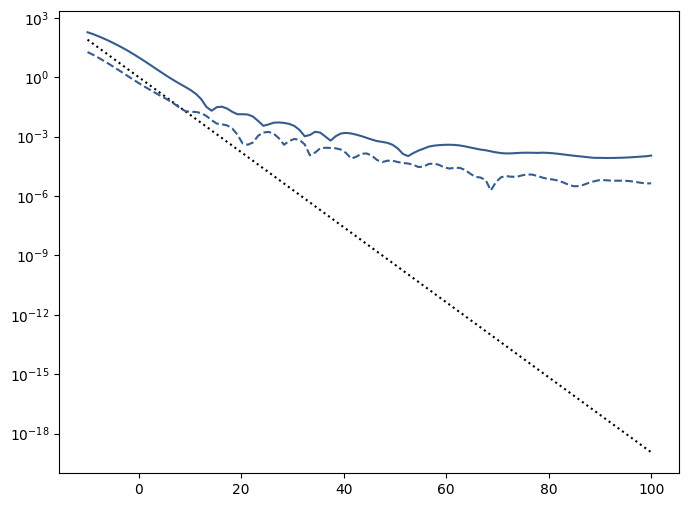

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_yscale('log')

cmap = plt.get_cmap('viridis')
num_modes = len(qnm_list)

for idx, mode in enumerate(qnm_list):
    if idx == 2:
        color = cmap(idx / (num_modes - 1))
        decay_const = qnmfits.qnm.omega_list([mode], sim_main_strain.chif_mag, Mf=sim_main_strain.Mf)[0].imag
        ax.plot(T0s, np.exp(decay_const * T0s), label=f'Strain Amplitude {mode}', color='k', ls=':')
        ax.plot(T0s, strain_amplitudes[:, idx], label=f'Strain Amplitude {qnm_list[idx]}', color=color)
        ax.plot(T0s, news_amplitudes[:, idx], label=f'News Amplitude {qnm_list[idx]}', linestyle='--', color=color)


(0.0, 100.0)

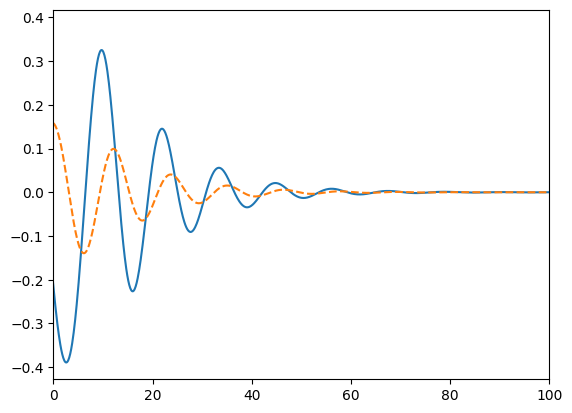

In [ ]:
plt.plot(sim_main_strain.times, np.abs(sim_main_strain.h[(2,2)]))
plt.plot(sim_main_news.times, np.abs(sim_main_news.h[(2,2)]), linestyle='--')

plt.xlim(0, 100)